In [1]:
import pickle
import pickletools
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import t

def load(seeds):
    data = {}
    data['group'] = {}
    data['main'] = {}
    for seed in seeds:
        with open(f'./datagroup/{seed}group.pickle', 'rb') as inp:
            d = pickle.load(inp)
        data['group'][seed] = d
        with open(f'./datamain/{seed}main.pickle', 'rb') as inp:
            d = pickle.load(inp)
        data['main'][seed] = d
    return data

In [2]:
seeds = [10,20,30,40,50]
experiments = [10000, 20000, 30000, 40000, 50000, 60000, 70000]
data = load(seeds)

# Success Rate

In [3]:
def successrate(data, experiments, seeds):
    for e in experiments:
        success_rate_GHO = 0
        success_rate_HO = 0
        for seed in seeds:
            r = len(data['group'][seed][str(e)]['sUE'])/e
            success_rate_GHO += r
            r = len(data['main'][seed][str(e)]['sUE'])/e
            success_rate_HO += r
        GHO_final_rate = success_rate_GHO / len(seeds)
        HO_final_rate = success_rate_HO / len(seeds)
        print(f"{e}: HO: {HO_final_rate} GHO: {GHO_final_rate}")
successrate(data, experiments, seeds)

10000: HO: 1.0 GHO: 1.0
20000: HO: 1.0 GHO: 1.0
30000: HO: 1.0 GHO: 1.0
40000: HO: 0.8124550000000001 GHO: 1.0
50000: HO: 0.66554 GHO: 1.0
60000: HO: 0.5626200000000001 GHO: 0.9286366666666666
70000: HO: 0.48706571428571427 GHO: 0.8270771428571428


# Total Messages

In [4]:
def totalmessage(data, experiments, seeds):
    for e in experiments:
        total_GHO = 0
        total_HO = 0
        for seed in seeds:
            r = data['group'][seed][str(e)]['total']
            total_GHO += r
            r = data['main'][seed][str(e)]['total']
            total_HO += r
        total_GHO_final = total_GHO / len(seeds)
        total_HO_final = total_HO / len(seeds)
        print(f"{e}: HO: {total_HO_final} GHO: {total_GHO_final}")
totalmessage(data, experiments, seeds)

10000: HO: 30000.0 GHO: 16558.8
20000: HO: 60000.0 GHO: 26820.0
30000: HO: 102060.2 GHO: 36938.4
40000: HO: 414555.4 GHO: 47379.6
50000: HO: 602981.6 GHO: 67275.0
60000: HO: 777770.4 GHO: 121982.2
70000: HO: 943105.8 GHO: 137979.8


# UE Messages

In [5]:
def UEmessage(data, experiments, seeds):
    for e in experiments:
        UE_GHO = 0
        UE_HO = 0
        for seed in seeds:
            r = data['group'][seed][str(e)]['totalUE']
            UE_GHO += r
            r = data['main'][seed][str(e)]['totalUE']
            UE_HO += r
        UE_GHO_final = UE_GHO / len(seeds)
        UE_HO_final = UE_HO / len(seeds)
        print(f"{e}: HO: {UE_HO_final} GHO: {UE_GHO_final}")
UEmessage(data, experiments, seeds)

10000: HO: 10000.0 GHO: 4787.8
20000: HO: 20000.0 GHO: 5007.6
30000: HO: 42060.2 GHO: 5089.8
40000: HO: 349456.4 GHO: 5355.0
50000: HO: 536317.8 GHO: 12497.8
60000: HO: 710143.2 GHO: 47664.6
70000: HO: 874797.6 GHO: 58135.2


# Drop Rate

In [6]:
def droprate(data, experiments, seeds):
    for e in experiments:
        drop_GHO = 0
        drop_HO = 0
        total_GHO = 0
        total_HO = 0
        drop_rate_GHO = 0
        drop_rate_HO = 0
        for seed in seeds:
            r = data['group'][seed][str(e)]['totaldrop']
            drop_GHO += r
            r = data['main'][seed][str(e)]['totaldrop']
            drop_HO += r
            r = data['group'][seed][str(e)]['total']
            total_GHO += r
            r = data['main'][seed][str(e)]['total']
            total_HO += r
            drop_rate_GHO += drop_GHO / total_GHO
            drop_rate_HO += drop_HO / total_HO
        droprate_final_GHO = drop_rate_GHO / len(seeds)
        droprate_final_HO = drop_rate_HO / len(seeds)
        print(f"{e}: HO: {droprate_final_HO} GHO: {droprate_final_GHO}")
droprate(data, experiments, seeds)

10000: HO: 0.0 GHO: 0.0
20000: HO: 0.0 GHO: 0.0
30000: HO: 0.009844385498938835 GHO: 0.0
40000: HO: 0.7452571832221835 GHO: 0.0
50000: HO: 0.8227844293393234 GHO: 0.0
60000: HO: 0.8616607650470864 GHO: 0.010869204415382566
70000: HO: 0.8856935136461749 GHO: 0.026056099618241922


# Sucess Waiting

In [7]:
def stat(values, confidence):
    v = np.array(values)
    m = v.mean()
    s = v.std()
    dof = len(v) - 1
    t_crit = np.abs(t.ppf((1-confidence)/2,dof))
    c = (m-s*t_crit/np.sqrt(len(v)), m+s*t_crit/np.sqrt(len(v)))
    conf = round(s*t_crit/np.sqrt(len(v)),2)
    mean = round(m,2)
    return mean, conf

def Swaiting(data, experiments, seeds):
    for e in experiments:
        sUE_GHO = []
        sUE_HO = []
        for seed in seeds:
            r = data['group'][seed][str(e)]['sUE']
            sUE_GHO += r
            r = data['main'][seed][str(e)]['sUE']
            sUE_HO += r
        m_GHO, c_GHO = stat(sUE_GHO, 0.95)
        m_HO, c_HO = stat(sUE_HO, 0.95)
        print(f"{e}: HO: {m_HO}±{c_HO} GHO: {m_GHO}±{c_GHO}")
Swaiting(data, experiments, seeds)

10000: HO: 8.99±0.0 GHO: 16.1±0.18
20000: HO: 9.24±0.0 GHO: 19.45±0.15


30000: HO: 27.94±0.08 GHO: 23.08±0.13
40000: HO: 214.23±0.7 GHO: 25.55±0.12
50000: HO: 246.2±0.71 GHO: 71.25±0.21
60000: HO: 263.77±0.72 GHO: 338.67±0.93
70000: HO: 274.47±0.72 GHO: 482.52±1.19


# Fail Waiting

In [8]:
def stat(values, confidence):
    v = np.array(values)
    m = v.mean()
    s = v.std()
    dof = len(v) - 1
    t_crit = np.abs(t.ppf((1-confidence)/2,dof))
    c = (m-s*t_crit/np.sqrt(len(v)), m+s*t_crit/np.sqrt(len(v)))
    conf = round(s*t_crit/np.sqrt(len(v)),2)
    mean = round(m,2)
    return mean, conf

def Fwaiting(data, experiments, seeds):
    for e in experiments:
        fUE_GHO = []
        fUE_HO = []
        for seed in seeds:
            r = data['group'][seed][str(e)]['fUE']
            fUE_GHO += r
            r = data['main'][seed][str(e)]['fUE']
            fUE_HO += r
        m_GHO, c_GHO = stat(fUE_GHO, 0.95)
        m_HO, c_HO = stat(fUE_HO, 0.95)
        print(f"{e}: HO: {m_HO}±{c_HO} GHO: {m_GHO}±{c_GHO}")
Fwaiting(data, experiments, seeds)

/tmp/ipykernel_4440/3827775346.py:3: RuntimeWarning: Mean of empty slice.
  m = v.mean()
/home/leosat/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/leosat/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/leosat/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:181: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/leosat/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


10000: HO: nan±nan GHO: nan±nan
20000: HO: nan±nan GHO: nan±nan
30000: HO: nan±nan GHO: nan±nan
40000: HO: 858.48±3.35 GHO: nan±nan
50000: HO: 887.84±2.14 GHO: nan±nan
60000: HO: 901.55±1.66 GHO: 437.15±2.03
70000: HO: 909.38±1.4 GHO: 568.81±1.68


In [9]:
def aggregate(data, seeds, HO_class, label, KPI):
    experiments = []
    for seed in seeds:
        experiment_data = data[HO_class][seed][label][KPI]
        experiments.append(experiment_data)
    means = np.mean(experiments, axis=0)
    std_devs = np.std(experiments, axis=0)
    conf_int = 1.96 * std_devs / np.sqrt(len(experiments))
    return means, conf_int
 
def draw(data):
    labels = ['10000', '20000', '30000', '40000', '50000', '60000', '70000']
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']#, 'deeppink', 'gold', 'orange', 'midnightblue', 'brown', 'grey']
    seeds = [10,20,30,40,50]
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    
    number_data = len(labels)

    y_max_total = 35000# np.max(data['main']['total_rate'])
    cutoff = 15000
    fontsize = 20
    legendsize = 18
    tick_size = 18
    grid = True
    
    HO_class = 'main'
    KPI = 'dynamictotal'
    place = (0,0)
    for i in range(number_data):
        label = labels[i]
        color = colors[i]
        m,err = aggregate(data, seeds, HO_class, label, KPI)
        m = m[:cutoff]
        err = err[:cutoff]
        x = list(range(len(m)))
        axes[place].plot(x, m, color, label=f'UE number {label}')
        axes[place].fill_between(x, (m-err), (m+err), color=color, alpha=0.6)
    
    axes[place].set_ylim(0, y_max_total + 100)
    #axes[place].set_xlabel('Timestamp (ms)')
    axes[place].set_ylabel('Message count',fontsize=fontsize)
    #axes[place].legend(fontsize=legendsize)
    axes[place].set_title(f'Received total # of messages \n every 200 ms (HO)', fontsize=fontsize)
    axes[place].grid(grid)
    axes[place].tick_params(labelsize=tick_size)
    axes[place].spines['top'].set_visible(False)
    axes[place].spines['right'].set_visible(False)
    
    HO_class = 'main'
    KPI = 'dynamicdrop'
    place = (1,0)
    for i in range(number_data):
        label = labels[i]
        color = colors[i]
        m,err = aggregate(data, seeds, HO_class, label, KPI)
        m = m[:cutoff]
        err = err[:cutoff]
        x = list(range(len(m)))
        axes[place].plot(x, m, color, label=f'UE number {label}')
        axes[place].fill_between(x, (m-err), (m+err), color=color, alpha=0.6)
    
    axes[place].set_ylim(0, y_max_total + 100)
    axes[place].set_xlabel('Timestamp (ms)', fontsize=fontsize)
    axes[place].set_ylabel('Message count',fontsize=fontsize)
    #axes[place].legend(fontsize=legendsize)
    axes[place].set_title(f'Dropped total # of messages \n every 200 ms (HO)', fontsize=fontsize)
    axes[place].grid(grid)
    axes[place].tick_params(labelsize=tick_size)
    axes[place].spines['top'].set_visible(False)
    axes[place].spines['right'].set_visible(False)
    

    HO_class = 'group'
    KPI = 'dynamictotal'
    place = (0,1)
    for i in range(number_data):
        label = labels[i]
        color = colors[i]
        m,err = aggregate(data, seeds, HO_class, label, KPI)
        m = m[:cutoff]
        err = err[:cutoff]
        x = list(range(len(m)))
        axes[place].plot(x, m, color, label=f'UE number {label}')
        axes[place].fill_between(x, (m-err), (m+err), color=color, alpha=0.1)
    
    axes[place].set_ylim(0, y_max_total + 100)
    #axes[place].set_xlabel('Timestamp (ms)')
    #axes[place].set_ylabel('Message count')
    axes[place].legend(fontsize=legendsize)
    axes[place].set_title(f'Received total # of messages \n every 200 ms (GHO)',fontsize=fontsize)
    axes[place].grid(grid)
    axes[place].tick_params(labelsize=tick_size)
    axes[place].spines['top'].set_visible(False)
    axes[place].spines['right'].set_visible(False)

    HO_class = 'group'
    KPI = 'dynamicdrop'
    place = (1,1)
    for i in range(number_data):
        label = labels[i]
        color = colors[i]
        m,err = aggregate(data, seeds, HO_class, label, KPI)
        m = m[:cutoff]
        err = err[:cutoff]
        x = list(range(len(m)))
        axes[place].plot(x, m, color, label=f'UE number {label}')
        axes[place].fill_between(x, (m-err), (m+err), color=color, alpha=0.6)
    
    axes[place].set_ylim(0, y_max_total + 100)
    axes[place].set_xlabel('Timestamp (ms)',fontsize=fontsize)
    #axes[place].set_ylabel('Message count',fontsize=fontsize)
    #axes[place].legend(fontsize=legendsize)
    axes[place].set_title(f'Dropped total # of messages \n every 200 ms (GHO)', fontsize=fontsize)
    axes[place].grid(grid)
    axes[place].tick_params(labelsize=tick_size)
    axes[place].spines['top'].set_visible(False)
    axes[place].spines['right'].set_visible(False)

    fig.tight_layout()
    plt.savefig('dynamic_res.png', dpi=300)




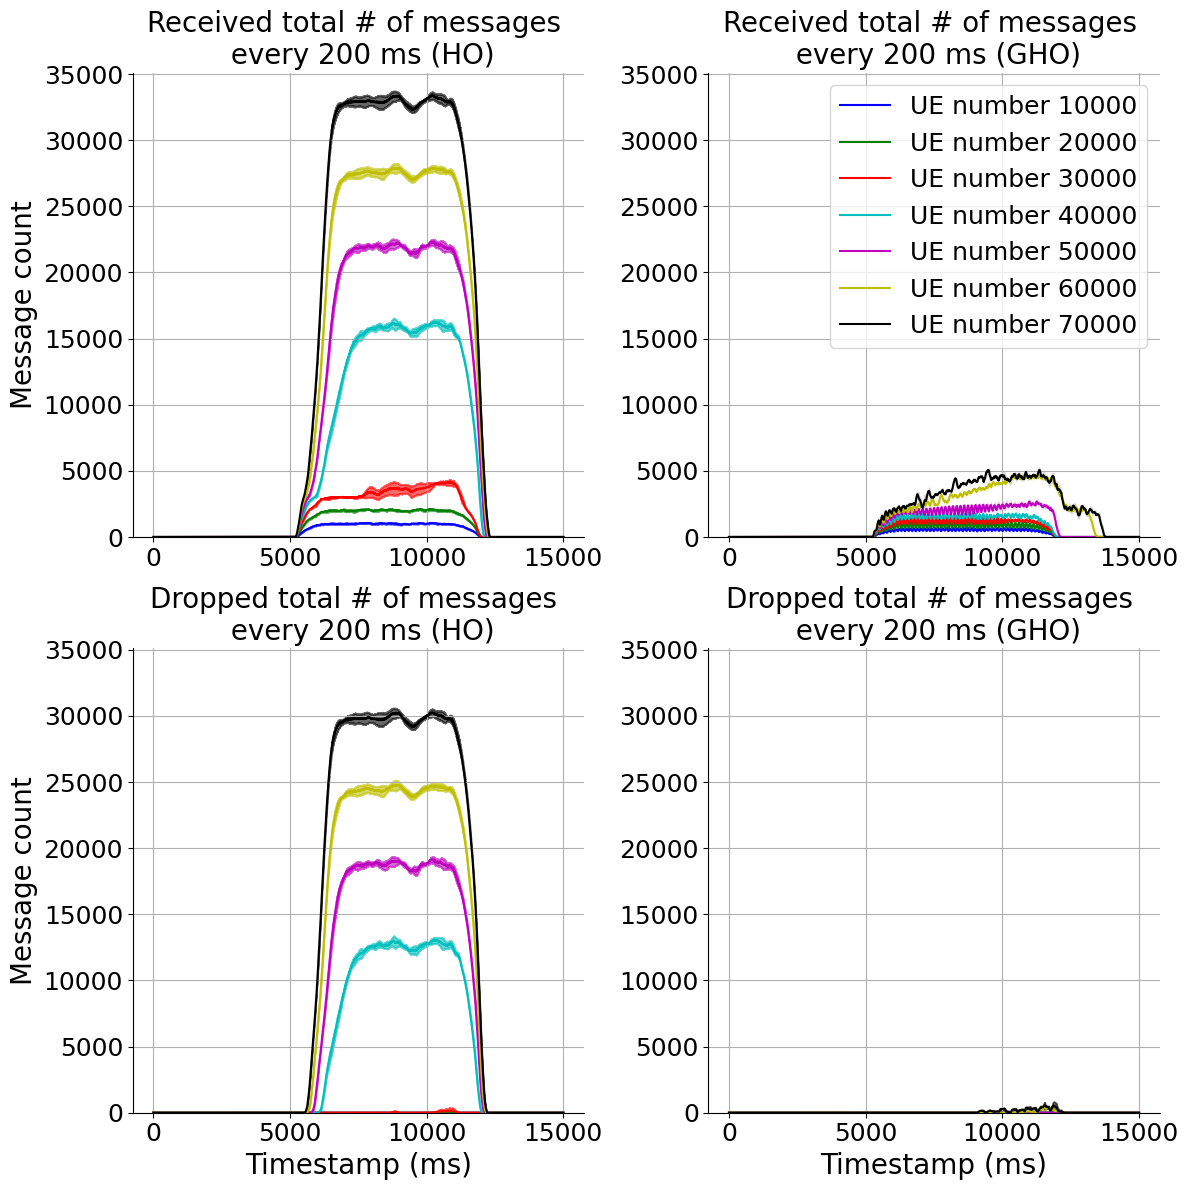

In [10]:
draw(data)